# Problem Analysis Workshop 5 - Customer satisfication in hotel industry
### Course: `Data Analysis Mathematics, Algorithms and Modeling`
### Team 7 - Members:
- **Tilvan Madalina**  - Student number: 9058215
- **Wesley Jayavanti** - Student number: 9019852
- **Yun-Chen Wang**    - Student number: 9040873

---

## About this workshop:
1. Study the differences between `Simple Regression`, `Multiple Linear Regression`, `Non-Linear Regression`, and `Logistic Regression`.
2. Performs the following exploration and validation:
    - Implementing a `Non-linear Regression` with TripAdvisor Dataset
        - Writing a 500-word discussion on its relevance to the term project
    - Implementing a `Logistic Regression` with TripAdvisor Dataset
        - Writing a 500-word discussion on its relevance to the term project

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from IPython.display import display

import statsmodels.formula.api as smf

from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score, roc_auc_score, roc_curve 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import make_pipeline

## Load clean datasets as pandas dataframes

In [ ]:
# Load cleaned dataset
path = "../dataset/clean_df.csv"
clean_df = pd.read_csv(path)
print(f"Load dataframe from {path}, Shape: {clean_df.shape}")
display(clean_df.head()) # print the first 5 rows of the dataset

Load dataframe from ../dataset/clean_df.csv, Shape: (1048575, 85)


,Destination_country_id,Visitors_country_id,Overall_rating,Location_rating,Cleanliness_rating,Rooms_rating,Service_rating,Sleepquality_rating,Value_rating,Hotel.stars,...,Trip_type_couple,Trip_type_family,Trip_type_friends,Trip_type_solo,Trip_type_unknown,Reviewer_rank_Reviewer,Reviewer_rank_Senior Contributor,Reviewer_rank_Senior Reviewer,Reviewer_rank_Top Contributor,Reviewer_rank_Unknown
0,59,1,3,2,3,3,3,3,4,5,...,0,0,0,0,0,1,0,0,0,0
1,96,1,4,5,5,3,5,4,5,3,...,0,1,0,0,0,0,0,0,1,0
2,59,1,5,5,5,3,5,5,4,5,...,0,0,0,0,0,0,0,0,0,1
3,199,1,4,3,5,4,5,4,4,5,...,0,0,0,1,0,0,0,1,0,0
4,49,1,3,5,4,3,5,4,5,3,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
# Replace all non-alphanumeric characters in column names with underscores
clean_df.columns = clean_df.columns.str.replace(r'\W+', '_', regex=True)
# clean_df.to_csv("../dataset/clean_df.csv", index=False)

In [4]:
df = clean_df #transformed_df

Fetch significant_columns by perfoming mlr.

In [ ]:
# Select numerical columns (excluding 'Overall_rating')
predictors = [col for col in df.select_dtypes(include=['number']).columns if col != 'Overall_rating']

# Create the formula for the model
formula_mlr = "Overall_rating ~ " + " + ".join(predictors) 

# Fit the model
model_mlr = smf.ols(formula=formula_mlr, data=df).fit()

# Print the model summary
# print("\nMLR Model Summary:")
# print(model_mlr.summary())

# Extract significant predictors from the MLR model (exclude 'Intercept')
# significant_columns = [col for col in model_mlr.pvalues.index if col != 'Intercept' and model_mlr.pvalues[col] < 0.05]
significant_columns = [col for col in model_mlr.pvalues.index if col != 'Intercept' and model_mlr.pvalues[col] == 0]


In [19]:
significant_columns

['Location_rating',
 'Cleanliness_rating',
 'Rooms_rating',
 'Service_rating',
 'Sleepquality_rating',
 'Value_rating',
 'Hotel_price']

## **Simple Regression**

Definition: A regression with one independent variable (feature) predicting a continuous dependent variable (output).

Example in a TripAdvisor dataset:

Predicting hotel rating (y) based on the number of reviews (x).

🔹 Formula:𝑦=𝛽0+𝛽1𝑥+𝜖y=β0​ +β1​x+ϵ
🔹 Example Model in Python:

In [25]:
# Example dataset: Predicting hotel rating based on number of reviews
X = df[['Service_rating']]  # Independent variable
y = df['Overall_rating']  # Dependent variable

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# Evaluate
print("\nModel Performance:")
print("R² Score:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))


Model Performance:
R² Score: 0.5555294434762974
MSE: 0.47033056446029153


## **Multiple Linear Regression**

 Definition: A regression with multiple independent variables predicting a continuous dependent variable.

Example in a TripAdvisor dataset:

Predicting hotel rating (y) based on number of reviews, hotel price, and location score (X1, X2, X3).

🔹 Formula:𝑦=𝛽0+𝛽1𝑥1+𝛽2𝑥2+𝛽3𝑥3+𝜖
🔹 Example Model in Python:

In [26]:
X = df[significant_columns]
y = df['Overall_rating']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# Evaluate
print("\nModel Performance:")
print("R² Score:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))


Model Performance:
R² Score: 0.6959723471543385
MSE: 0.3217164679991846


## **Non-Linear Regression**

 Definition: A regression where the relationship between variables is not a straight line (e.g., exponential, polynomial, logarithmic).

Example in a TripAdvisor dataset:

Predicting customer satisfaction where ratings increase rapidly with more reviews at first but then plateau.

🔹 Example: Quadratic Relationship

𝑦=𝛽0+𝛽1𝑥+𝛽2𝑥^2+𝜖

 Example Model in Python (Polynomial Regression):

In [16]:
# Feature and Target
X = df[significant_columns] 
y = df['Overall_rating']

# Convert target to binary class based on median
# y_class = (y > y.median()).astype(int)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Degree: 2
Intercept: 4.127176320118602
Coefficients:
  1: -5.937255107839066e-19
  Location_rating: 0.04972733754763714
  Cleanliness_rating: 0.10082254323526335
  Rooms_rating: 0.19911263633687432
  Service_rating: 0.3298324836191247
  Sleepquality_rating: 0.10305830206303751
  Value_rating: 0.1943455012545816
  Hotel_price: 0.06037731496472123
  Location_rating^2: -0.01892953555066478
  Location_rating Cleanliness_rating: 0.01204288881057295
  Location_rating Rooms_rating: -0.011474835844436562
  Location_rating Service_rating: 0.02062249767672209
  Location_rating Sleepquality_rating: 0.011633814442205225
  Location_rating Value_rating: 0.009589439344388702
  Location_rating Hotel_price: 0.0073175078188201705
  Cleanliness_rating^2: -0.0674777108426429
  Cleanliness_rating Rooms_rating: 0.007112134961411092
  Cleanliness_rating Service_rating: 0.068906068583099
  Cleanliness_rating Sleepquality_rating: 0.035426157488865614
  Cleanliness_rating Value_rating: 0.02610169874022223
  Cle

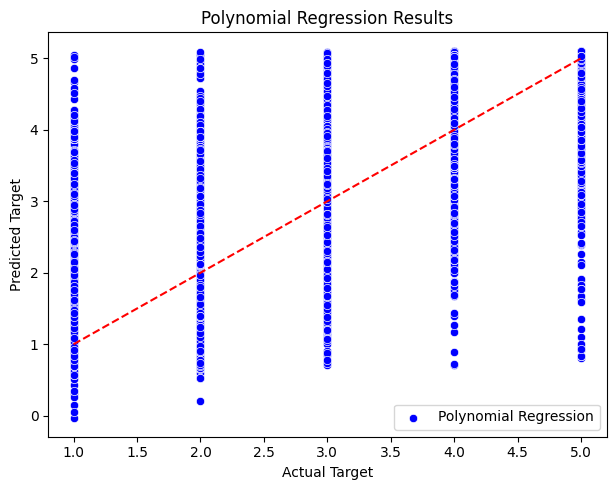

In [17]:
# Fit polynomial regression
poly_degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree=poly_degree), LinearRegression())
poly_model.fit(X_train_scaled, y_train)
y_pred_poly = poly_model.predict(X_test_scaled)

# Extract model components
linreg = poly_model.named_steps['linearregression']
poly_features = poly_model.named_steps['polynomialfeatures']
feature_names = poly_features.get_feature_names_out(input_features=X.columns)

print(f"Degree: {poly_degree}")
print("Intercept:", linreg.intercept_)
print("Coefficients:")
for name, coef in zip(feature_names, linreg.coef_):
    print(f"  {name}: {coef}")

# Evaluate
print("\nModel Performance:")
print("R² Score:", r2_score(y_test, y_pred_poly))
print("MSE:", mean_squared_error(y_test, y_pred_poly))

# Visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_poly, color='blue', label='Polynomial Regression')
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("Polynomial Regression Results")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.legend()
plt.tight_layout()
plt.show()

### **Discussion** 

**Relevance of Non-Linear Regression in Analyzing Customer Satisfaction in the Hotel Industry**

Customer satisfaction is a multifaceted concept influenced by numerous factors, ranging from tangible aspects like cleanliness and service quality to more abstract cultural variables such as Hofstede’s dimensions. The complexity of these interactions necessitates an analytical approach that goes beyond simple linear models, making non-linear regression an essential tool for understanding the nuanced relationships among these variables. Our term project employs non-linear regression techniques, specifically polynomial regression, to analyze customer satisfaction based on hotel reviews and external socio-economic indicators. The model’s performance, as demonstrated by an R² score of 0.71, suggests that this approach captures a substantial portion of the variance in customer ratings, underscoring the significance of non-linear relationships in this domain.

**The Necessity of Non-Linear Regression in Customer Satisfaction Analysis**

Traditional linear regression assumes a straight-line relationship between dependent and independent variables. However, customer satisfaction is influenced by interactions and diminishing returns on certain factors. For instance, while increasing cleanliness ratings generally leads to higher satisfaction, its impact might plateau beyond a certain threshold. Similarly, interactions between variables—such as the combined effect of location and service quality—could exhibit multiplicative rather than additive influences. Non-linear regression, by incorporating polynomial terms and interaction effects, provides a more flexible framework to model these complexities.

Our polynomial regression model incorporates squared terms and interaction terms for key hotel attributes such as cleanliness, service quality, and room ratings. The inclusion of these higher-order terms allows for a better representation of real-world customer behavior, where satisfaction may not increase proportionally with incremental improvements in a single factor. Instead, the influence of different attributes is dynamic, with interdependencies affecting overall perception.

**Key Findings from the Non-Linear Model**

One of the key takeaways from our model is the significance of interaction terms. For example, the interaction between cleanliness and service quality (β = 0.0689) suggests that a well-maintained hotel that also provides excellent service has a compounded positive effect on satisfaction. Similarly, the negative coefficient for the squared term of cleanliness (β = -0.0674) indicates diminishing returns—while improving cleanliness initially enhances satisfaction, further improvements beyond a certain point yield marginal benefits.

Additionally, the impact of pricing on satisfaction is non-linear. The negative coefficient for the squared term of hotel price (β = -0.0080) implies that as hotel prices increase, customer satisfaction follows a concave pattern, suggesting an optimal price range where satisfaction peaks before declining.

**Implications for Hotel Management and Future Research**

From a managerial perspective, the findings highlight the importance of balancing various factors to maximize customer satisfaction. Investing in service quality improvements alongside cleanliness enhancements may be more effective than disproportionately focusing on one area. Moreover, hotels must be mindful of pricing strategies, as excessive pricing can negate satisfaction gains from other factors.

Future research could refine this model by integrating additional non-linear techniques such as neural networks or support vector machines to capture even more intricate patterns in customer behavior. Additionally, expanding the dataset to incorporate temporal trends and sentiment analysis from customer reviews could further enhance predictive accuracy.

In conclusion, our application of non-linear regression to hotel customer satisfaction analysis provides crucial insights into the intricate and interconnected nature of consumer perceptions. By moving beyond simplistic linear models, we can more effectively inform hotel management strategies and contribute to a deeper understanding of hospitality industry dynamics.



## **Logistic Regression**

Definition: Used for classification problems where the output is categorical (e.g., positive vs. negative review).

Example in a TripAdvisor dataset:

Predicting whether a review is positive (1) or negative (0) based on review text, rating, and hotel category.

🔹 Formula (Sigmoid Function):

𝑃(𝑦=1)=1/(1+𝑒−(𝛽0+𝛽1𝑥1+𝛽2𝑥2))

​
Example Model in Python:

In [18]:
# Feature and Target
X = df[significant_columns] 
y = df['Overall_rating']

# Convert target to binary class based on median
y_class = (y > y.median()).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Evaluation
print("\nLogistic Regression Classification Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Logistic Regression Classification Results:
Confusion Matrix:
[[112466  16775]
 [ 17814  62660]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87    129241
           1       0.79      0.78      0.78     80474

    accuracy                           0.84    209715
   macro avg       0.83      0.82      0.83    209715
weighted avg       0.83      0.84      0.83    209715



### **Discussion** 

**The Relevance of Logistic Regression in Analyzing Customer Satisfaction in the Hotel Industry**

Understanding customer satisfaction in the hotel industry is crucial for improving service quality, refining marketing strategies, and ensuring guest retention. Given the complexity of the factors involved, employing classification models such as logistic regression helps distinguish between satisfied and dissatisfied customers based on various hotel attributes. Our logistic regression model has been instrumental in classifying customer satisfaction levels, as evidenced by the model’s accuracy of 84% and a strong performance in precision, recall, and F1-score across both satisfied (class 1) and dissatisfied (class 0) customers.

**The Necessity of Logistic Regression in Customer Satisfaction Analysis**

Unlike regression models that predict continuous satisfaction scores, logistic regression is particularly useful for classification tasks—such as predicting whether a customer will be satisfied or dissatisfied based on their experiences. The binary nature of customer sentiment (satisfied vs. dissatisfied) aligns well with logistic regression, allowing us to analyze factors that significantly influence the likelihood of positive or negative experiences.

Logistic regression provides probabilities for customer satisfaction rather than fixed scores, making it ideal for understanding the likelihood of a customer expressing a positive rating. The model also allows for the interpretation of coefficients to identify which factors have the most substantial impact on customer perceptions.

**Key Findings from the Logistic Regression Model**

Our confusion matrix reveals that the model correctly classifies a significant number of cases, with 112,466 true negatives (correctly identified dissatisfied customers) and 62,660 true positives (correctly identified satisfied customers). However, the model misclassifies 16,775 dissatisfied customers as satisfied and 17,814 satisfied customers as dissatisfied. While the model performs well overall, these misclassifications suggest room for improvement, particularly in distinguishing borderline cases.

The classification report further underscores the model’s effectiveness, with an overall accuracy of 84%. Precision for class 0 (dissatisfied customers) stands at 86%, meaning that when the model predicts dissatisfaction, it is correct 86% of the time. Meanwhile, recall for class 1 (satisfied customers) is 78%, indicating that 78% of actual satisfied customers are correctly identified. These metrics highlight that while the model effectively captures customer sentiment, it is slightly more confident in predicting dissatisfaction than satisfaction.

**Implications for Hotel Management and Future Research**

From a managerial perspective, these results emphasize the need for targeted improvements to reduce dissatisfaction and enhance satisfaction. By analyzing the feature coefficients in the logistic regression model, hotel managers can identify which factors—such as cleanliness, service quality, or pricing—contribute most significantly to customer sentiment and prioritize changes accordingly.

Additionally, the model can be improved by incorporating more advanced classification techniques, such as ensemble methods or deep learning, to refine predictions and reduce misclassifications. Further research can also explore customer segmentation based on demographics, travel purpose, and cultural factors to personalize service offerings and improve overall satisfaction.

In conclusion, logistic regression provides valuable insights into customer satisfaction classification, offering a robust framework for identifying key drivers of guest sentiment. By leveraging these findings, hotel management can implement data-driven strategies to enhance service quality and optimize customer experiences, ultimately leading to increased customer retention and profitability.



**Summary Table**

**Regression Type**   --------------------        **Output Type**	  --------------------------                        **Example in TripAdvisor Dataset**

Simple Regression	-------------------        Continuous	---------------------------------                           Predicting rating from num_reviews

Multiple Linear Regression	-----------         Continuous	-----------------------------       Predicting rating using num_reviews, price, location_score

Non-Linear Regression	------------------       Continuous	-----------------------------        Predicting rating trends where effect of reviews plateaus

Logistic Regression	  -----------------          Categorical (0/1)	-----------------------------           Predicting if a review is positive or negative
